# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
housing  = pd.read_csv('Housing_data.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Preprocessing of Data 

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATION  506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [94]:
housing.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATION    0
B           0
LSTAT       0
MEDV        0
dtype: int64

In [95]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [96]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [97]:
housing.shape

(506, 14)

# EDA

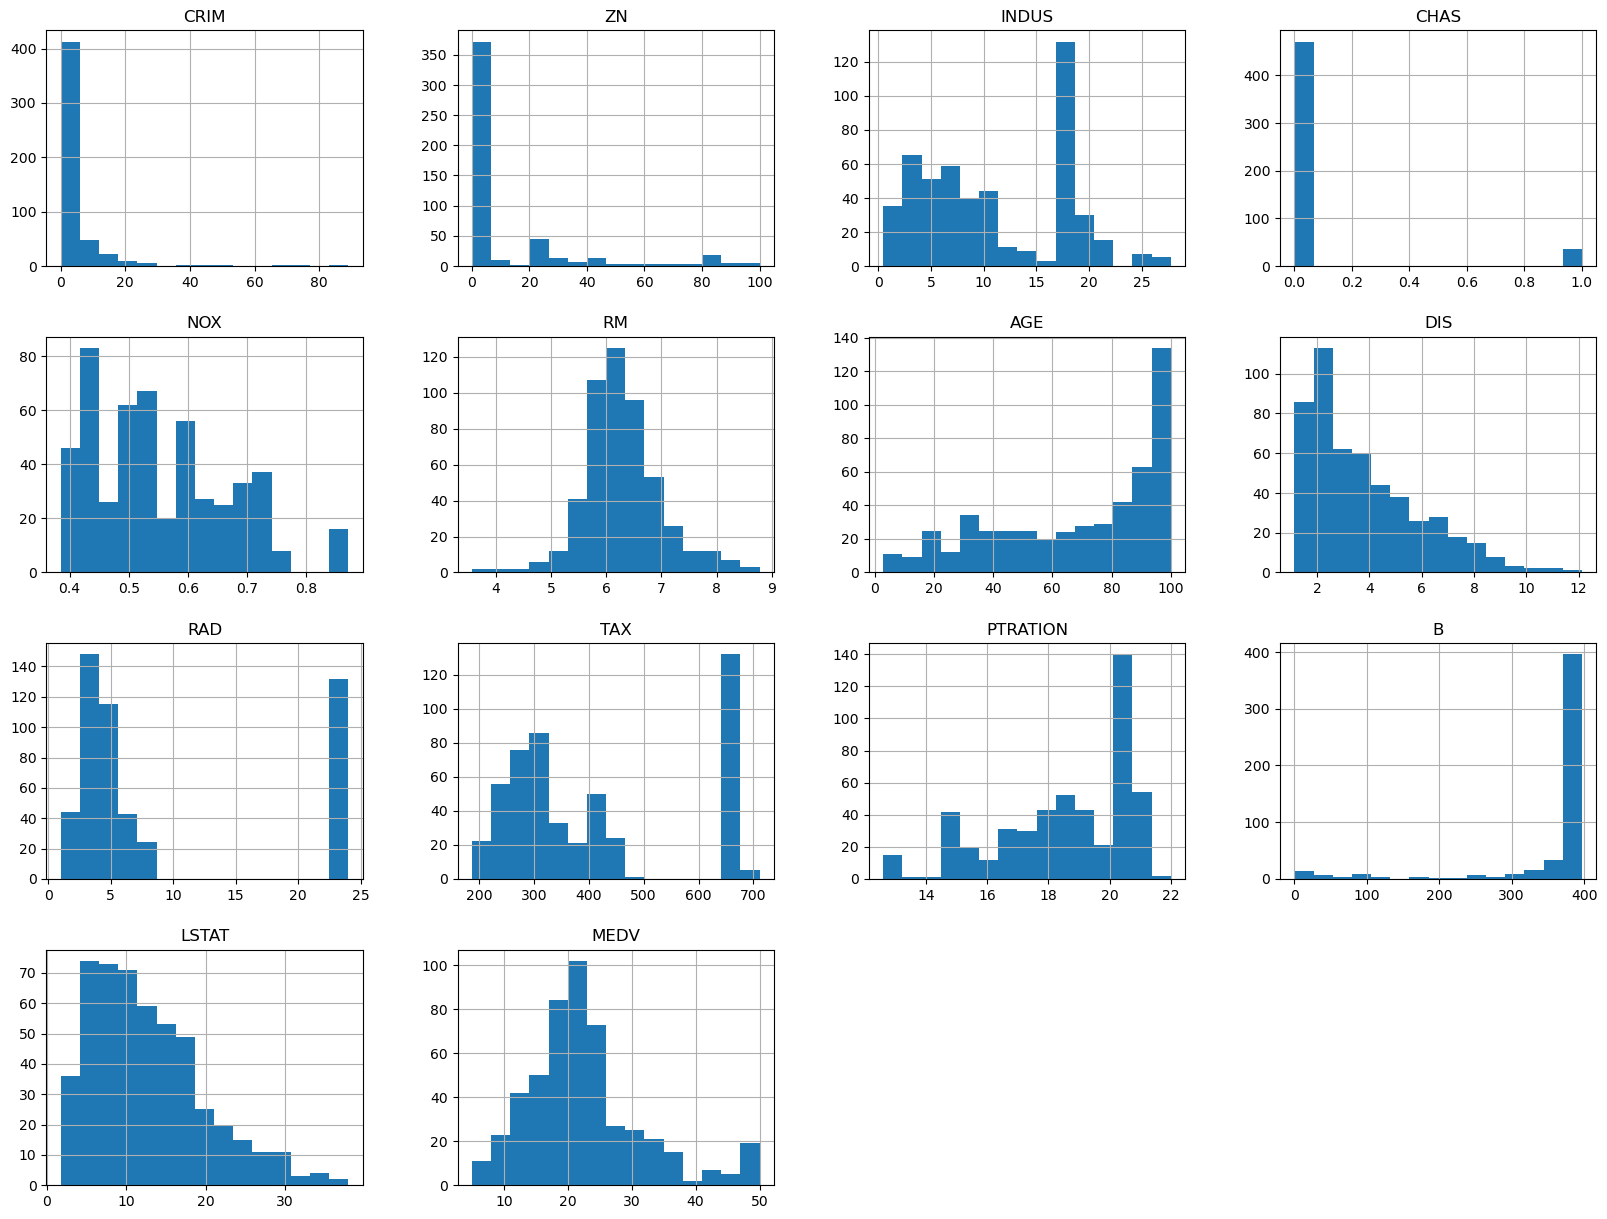

In [99]:
housing.hist(bins=15 , figsize=(20,15))
plt.show()

# Spliting Data

In [100]:
x = housing.drop(columns=['MEDV'])
y = housing['MEDV']

In [101]:
x.shape

(506, 13)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state=42)

In [103]:
X_train.shape

(404, 13)

In [104]:
X_test.shape

(102, 13)

In [105]:
y_train.shape

(404,)

In [106]:
y_test.shape

(102,)

In [107]:
corr_matrix = housing.corr()

In [108]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV        1.000000
RM          0.695360
ZN          0.360445
B           0.333461
DIS         0.249929
CHAS        0.175260
AGE        -0.376955
RAD        -0.381626
CRIM       -0.388305
NOX        -0.427321
TAX        -0.468536
INDUS      -0.483725
PTRATION   -0.507787
LSTAT      -0.737663
Name: MEDV, dtype: float64

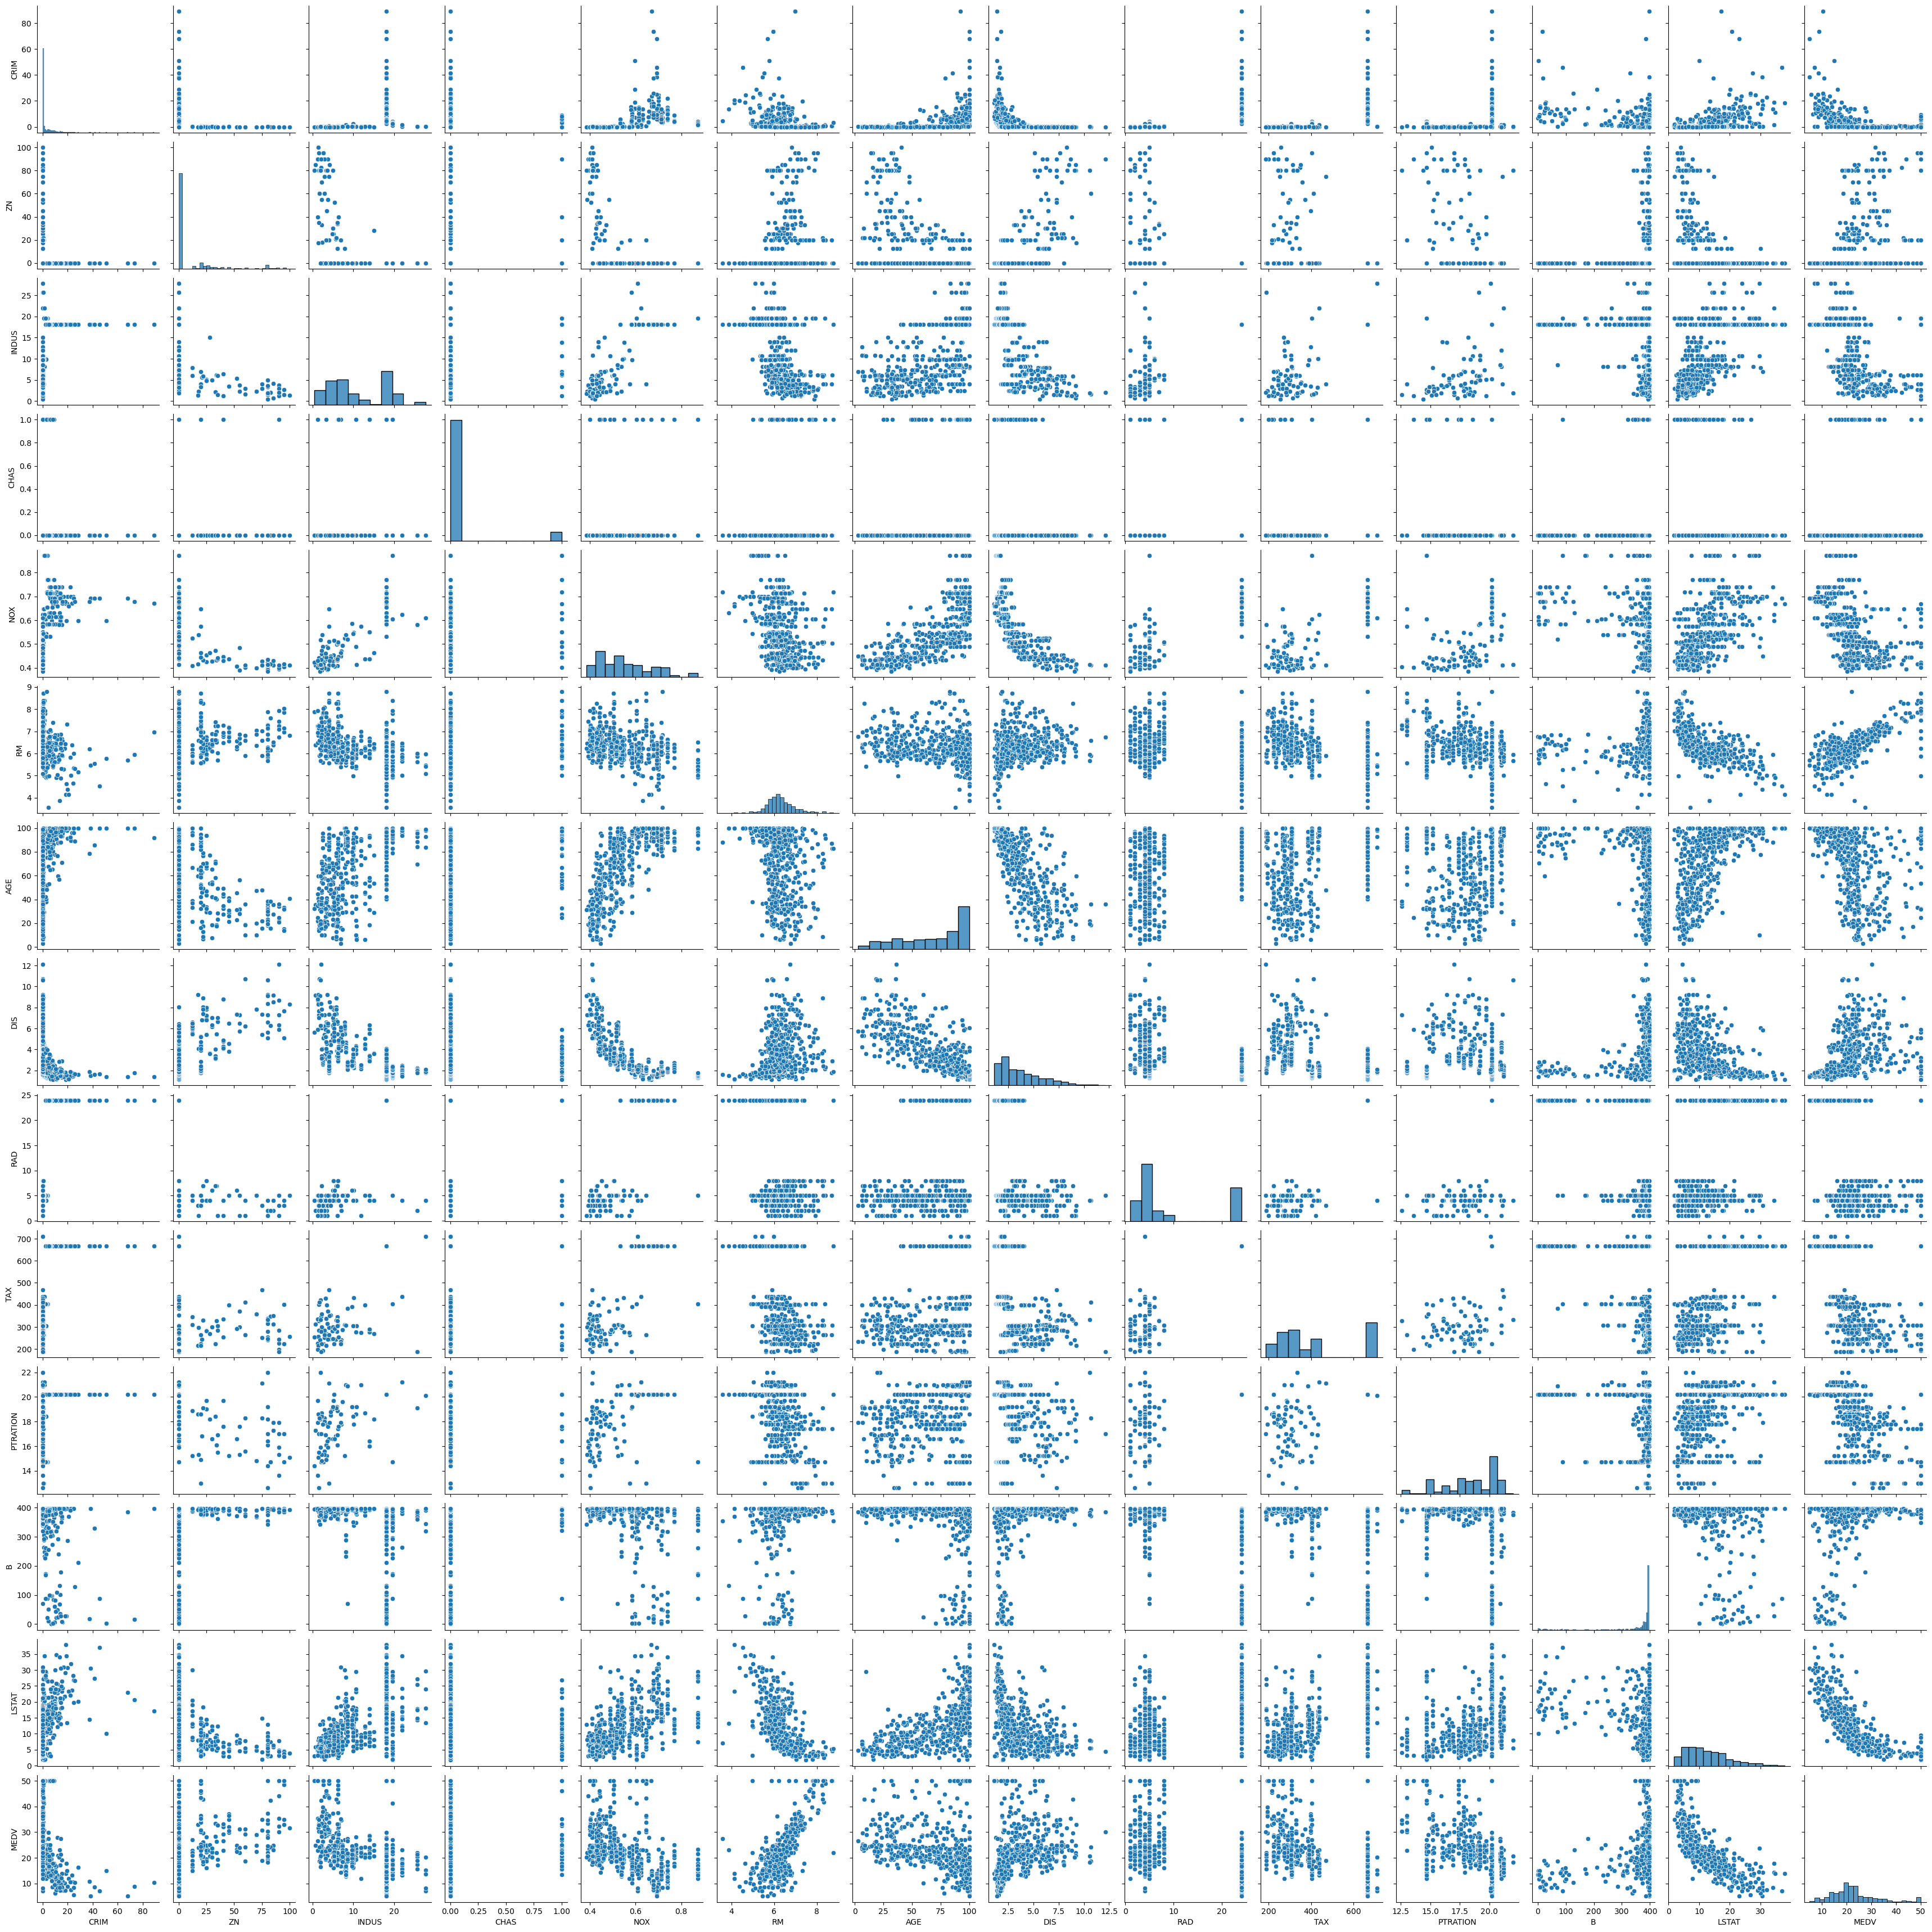

In [6]:
sns.pairplot(housing)

# Scaling Data

In [111]:
df = StandardScaler()
data = df.fit_transform(X_train,y_train)

In [112]:
scaled_ss = pd.DataFrame(data,columns=x.columns)
scaled_ss

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


# Build Model

In [51]:
lm = LinearRegression()

# Train the model using training data sets
lm.fit(X_train,y_train)

# Predict on the test data
y_pred=lm.predict(X_test)
y_pred[:3]

array([28.99672362, 36.02556534, 14.81694405])

In [52]:
ds = pd.DataFrame(zip(y_test,y_pred),columns=['Actual O/p','Predicted O/p'])
ds[:10]

,Actual O/p,Predicted O/p
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880
5,20.0,23.254429
6,17.8,17.662538
7,14.0,14.341190
8,19.6,23.013207
9,16.8,20.632456


In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

In [54]:
mse = mean_squared_error(y_test,y_pred)
print(f"MSE value:{mse}")
rmse = np.sqrt(mse)
print(f"RMSE value:{rmse}")
mae = mean_squared_error(y_test,y_pred)
print(f"MAE value:{mae}")

MSE value:24.291119474973613
RMSE value:4.928602182665346
MAE value:24.291119474973613


# Check R2Score

In [55]:
r2_score = r2_score(y_test,y_pred)
print(f"r2_score:{r2_score*100}")

r2_score:66.87594935356307


# KNeighborsRegressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train,y_train)

# Predict on the test data
y_pred=knn_model.predict(X_test)
y_pred[:3]

array([24.54, 29.34, 14.6 ])

In [60]:
ds = pd.DataFrame(zip(y_test,y_pred),columns=['Actual O/p','Predicted O/p'])
ds[:10]

,Actual O/p,Predicted O/p
0,23.6,24.54
1,32.4,29.34
2,13.6,14.60
3,22.8,28.00
4,16.1,16.74
5,20.0,31.88
6,17.8,19.74
7,14.0,16.06
8,19.6,18.02
9,16.8,21.18


In [61]:
mse = mean_squared_error(y_test,y_pred)
print(f"MSE value:{mse}")
rmse = np.sqrt(mse)
print(f"RMSE value:{rmse}")
mae = mean_squared_error(y_test,y_pred)
print(f"MAE value:{mae}")

MSE value:25.860125490196076
RMSE value:5.0852851926117255
MAE value:25.860125490196076


In [63]:
from sklearn.metrics import r2_score
import numpy as np

In [64]:
r2_score = r2_score(y_test,y_pred)
print(f"r2_score:{r2_score*100}")

r2_score:64.73640882039258


# Suport Vactor Machine

In [65]:
from sklearn.svm import SVR

In [66]:
SVM_model1 = SVR(kernel='linear',C=1)

In [67]:
SVM_model1.fit(X_train,y_train)

SVR(C=1, kernel='linear')

In [68]:
y_pred = SVM_model1.predict(X_test)
y_pred[:5]

array([26.11273   , 32.55199607, 15.52297042, 24.14099186, 18.49975564])

In [69]:
ds = pd.DataFrame(zip(y_test,y_pred),columns=['Actual O/p','Predicted O/p'])
ds[:10]

,Actual O/p,Predicted O/p
0,23.6,26.112730
1,32.4,32.551996
2,13.6,15.522970
3,22.8,24.140992
4,16.1,18.499756
5,20.0,21.229149
6,17.8,17.478481
7,14.0,16.375918
8,19.6,19.452127
9,16.8,20.169236


In [70]:
mse = mean_squared_error(y_test,y_pred)
print(f"MSE value:{mse}")
rmse = np.sqrt(mse)
print(f"RMSE value:{rmse}")
mae = mean_squared_error(y_test,y_pred)
print(f"MAE value:{mae}")

MSE value:29.435701924289845
RMSE value:5.4254678991115455
MAE value:29.435701924289845


In [72]:
from sklearn.metrics import r2_score
import numpy as np
r2_score = r2_score(y_test,y_pred)
print(f"r2_score:{r2_score*100}")

r2_score:59.86065268181071


# Decision Tree

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
clf

DecisionTreeRegressor()

In [115]:
predication = clf.predict(X_test)
predication[:5]

array([28.1, 33.1, 15.2, 21.7, 23.2])

In [118]:
ds = pd.DataFrame(zip(y_test,predication),columns=['Actual O/p','Predicted O/p'])
ds[:10]

,Actual O/p,Predicted O/p
0,23.6,28.1
1,32.4,33.1
2,13.6,15.2
3,22.8,21.7
4,16.1,23.2
5,20.0,18.5
6,17.8,16.6
7,14.0,16.7
8,19.6,22.6
9,16.8,22.0


In [119]:
mse = mean_squared_error(y_test,predication)
print(f"MSE value:{mse}")
rmse = np.sqrt(mse)
print(f"RMSE value:{rmse}")
mae = mean_squared_error(y_test,predication)
print(f"MAE value:{mae}")

MSE value:17.826372549019606
RMSE value:4.222128911937626
MAE value:17.826372549019606


In [120]:
from sklearn.metrics import r2_score
import numpy as np
r2_score5 = r2_score(y_test,predication)
print(f"r2_score:{r2_score5*100}")

r2_score:75.69145926912371


# Random Forest 

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
model1 = RandomForestRegressor(n_estimators=200)
model1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [126]:
y_pred =model1.predict(X_test)
y_pred[:5]

array([22.8035, 30.5035, 17.6765, 23.3765, 16.6535])

In [127]:
mse = mean_squared_error(y_test,y_pred)
print(f"MSE value:{mse}")
rmse = np.sqrt(mse)
print(f"RMSE value:{rmse}")
mae = mean_squared_error(y_test,y_pred)
print(f"MAE value:{mae}")

MSE value:9.595154987745097
RMSE value:3.0976047178013366
MAE value:9.595154987745097


In [128]:
from sklearn.metrics import r2_score
import numpy as np
r2_score = r2_score(y_test,y_pred)
print(f"r2_score:{r2_score*100}")

r2_score:86.91577800265931


In [129]:
data={'LR':66.87,'Knn':64.73,'SVM':59.86,'DT':75.69,'RDT':86.91}

In [131]:
keys=list(data.keys())
values=list(data.values())

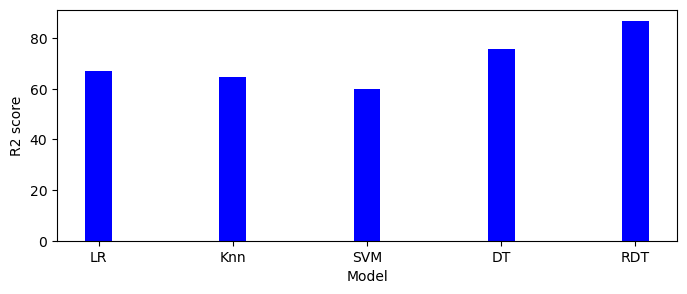

In [132]:
plt.figure(figsize=(8,3))
plt.bar(keys,values,color='BLUE',width=0.2)
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.show()